In [1]:
import pandas as pd
import numpy as np

# These assignments are needed since numpy 1.24.3 (these deprecated features are no longer supported)
np.object = object 
np.bool = bool
np.int = int
np.typeDict = np.sctypeDict

In [2]:
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from sklearn.preprocessing import MaxAbsScaler

#import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

2023-12-25 23:19:18.713736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 23:19:19.218277: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:


# Load the dataset file
dataset = pd.read_pickle('SNR_BBH-injections-reduced-100k.pkl')

dataset = dataset.loc[dataset["SNR"] <= 100]

TargetVariable = ['SNR']
Predictors = ['Mc', 'q', 'inc', 'ra' , 'dec' , 'spin1_mag', 'spin1_polar', 'spin1_azimuthal', 'spin2_mag', 'spin2_polar', 'spin2_azimuthal']


X = dataset[Predictors].values
y = dataset[TargetVariable].values


# Sandardization of data #
PredictorScaler = StandardScaler()
Xscaled = PredictorScaler.fit_transform(X)


TargetScaler =  StandardScaler()
yscaled = TargetScaler.fit_transform(y)

Xscaled = Xscaled.reshape(Xscaled.shape[0], Xscaled.shape[1], 1)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, yscaled, test_size=0.3, random_state=42)
 

In [4]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)


Input shape: (70000, 11, 1)
Target shape: (70000, 1)


In [5]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()


# Add the first convolutional layer with 32 filters and kernel size of 3, and input shape of (11, 1)
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(11, 1)))
model.add(MaxPooling1D(pool_size=2))

# Add the second convolutional layer with 64 filters and kernel size of 3
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Add the third convolutional layer with 128 filters and kernel size of 3
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a dense layer with 128 units and ReLU activation function
model.add(Dense(units=128, activation='relu'))

# Add an output layer with a single unit and no activation function (regression problem)
model.add(Dense(units=1))



model.compile(loss='mean_squared_error', optimizer='Nadam')

batch_size = 100 
epochs = 40 


# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = batch_size, epochs = epochs, verbose=1)


Epoch 1/40


2023-12-25 23:19:19.619848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 23:19:19.642693: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 23:19:19.642878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

469/469 [==============================] - 5s 4ms/step - loss: 0.3149 - val_loss: 0.2049
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1811 - val_loss: 0.1567
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1476 - val_loss: 0.1362
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1279 - val_loss: 0.1254
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1176 - val_loss: 0.1174
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1088 - val_loss: 0.1158
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1016 - val_loss: 0.1066
Epoch 8/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0958 - val_loss: 0.0998
Epoch 9/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0901 - val_loss: 0.0961
Epoch 10/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0850 - val_loss: 0.0932
Epoch 11/4

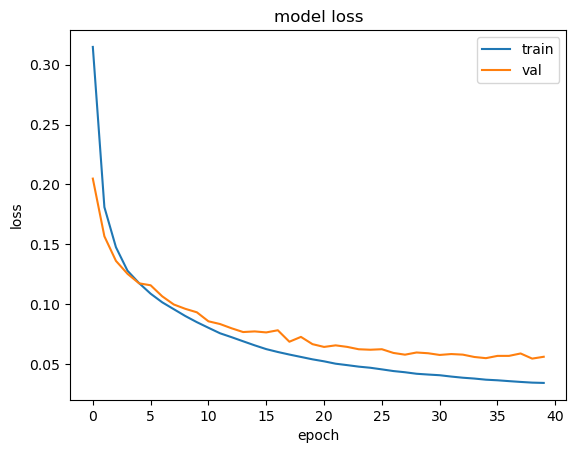

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig("Figure_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
# Generating Predictions on testing data
Predictions_scaled = model.predict(X_test)

# Scaling the test data back to original scale

X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1])
Test_Data = PredictorScaler.inverse_transform(X_test2)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetScaler.inverse_transform(y_test)

# Scaling the predicted Price data back to original price scale
Predictions = TargetScaler.inverse_transform(Predictions_scaled)

# Create table with test data and predictions
TestingData = pd.DataFrame( data = Test_Data, columns = Predictors)
TestingData['SNR'] = y_test_orig
TestingData['PredictedSNR'] = Predictions

# Computing the absolute percent error
APE = 100*(abs( (TestingData['SNR']-TestingData['PredictedSNR'])/TestingData['SNR']) )
TestingData['APE']=APE

# Computing the error
Error = TestingData['SNR']-TestingData['PredictedSNR']
TestingData['Error']=Error


TestingData.head()

938/938 [==============================] - 1s 733us/step


Mc         q       inc        ra       dec  spin1_mag  spin1_polar  \
0  35.003554  1.424405  2.881915  2.714784 -0.593721   0.087561     1.845172   
1  33.043862  1.430220  2.159692  0.333714 -0.672019   0.426129     2.789272   
2  12.576525  1.249113  2.653267  6.223362 -0.441824   0.418060     1.668667   
3  14.094041  1.046175  1.688527  0.372679 -0.670501   0.211174     1.675097   
4  28.938815  1.883850  1.042140  4.028659 -1.355127   0.879603     0.759802   

   spin1_azimuthal  spin2_mag  spin2_polar  spin2_azimuthal        SNR  \
0         0.846292   0.043483     0.444056         4.527779  22.056380   
1         2.629709   0.413839     0.240546         1.466044   8.942265   
2         1.316998   0.482938     2.688776         4.491220   9.389250   
3         0.640155   0.597561     1.658556         1.326345   2.860269   
4         2.571340   0.886561     2.805681         2.348903  25.286040   

   PredictedSNR        APE     Error  
0     22.848801   3.592706 -0.792421  
1      8.427788   5.753326  0.514478  
2     10.288566   9.578147 -0.899316  
3      1.659337  41.986678  1.200932  
4     19.819504  21.618792  5.466536

In [8]:
# Compute MAPE and accuracy

MAPE = np.mean(TestingData['APE'])
accuracy = 100 - MAPE

print('MAPE:', MAPE, 'accuracy:', accuracy)

MAPE: 17.89323816295449 accuracy: 82.10676183704551


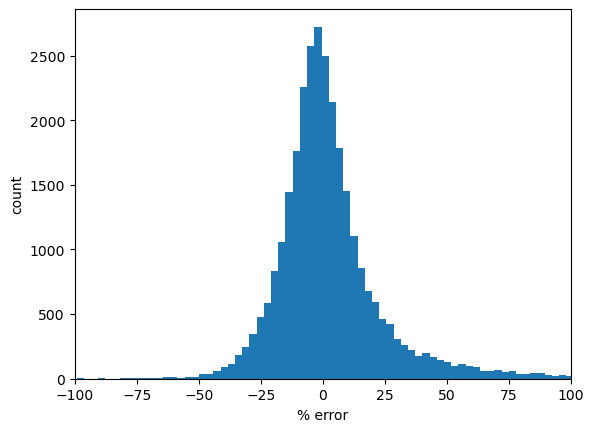

In [9]:
rel_error = 100*(Predictions - y_test_orig)/y_test_orig

count, bins, ignored = plt.hist(rel_error, 2000)
plt.xlabel('% error')
plt.ylabel('count')
plt.xlim(-100,100)

plt.show()

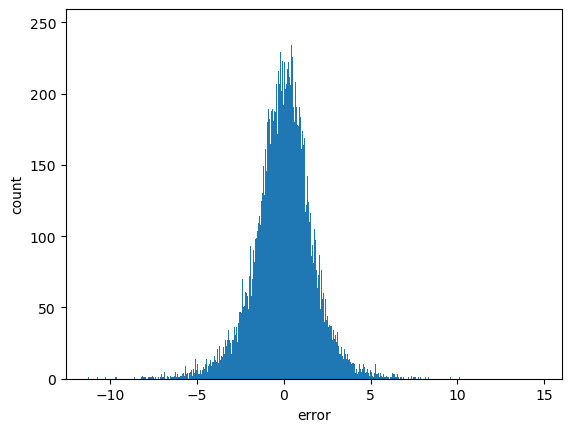

In [10]:
count, bins, ignored = plt.hist(TestingData['Error'], 1000)
#plt.xlim(-100,100)
plt.xlabel('error')
plt.ylabel('count')

plt.savefig("Figure_error.pdf", format="pdf", bbox_inches="tight")
plt.show()

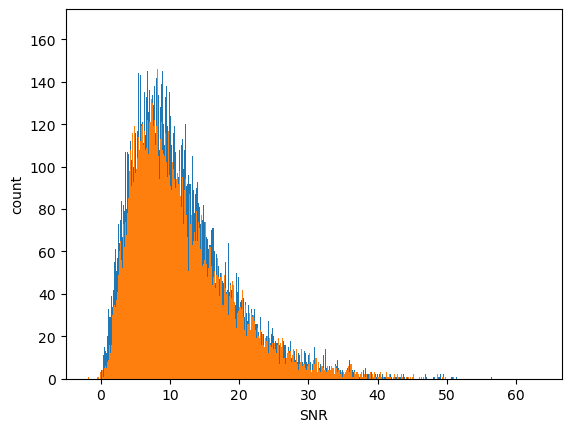

In [11]:
count, bins, ignored = plt.hist(y_test_orig, 1000)
count, bins, ignored = plt.hist(Predictions, 1000)
plt.xlabel('SNR')
plt.ylabel('count')

plt.savefig("Figure_SNR.pdf", format="pdf", bbox_inches="tight")
plt.show()

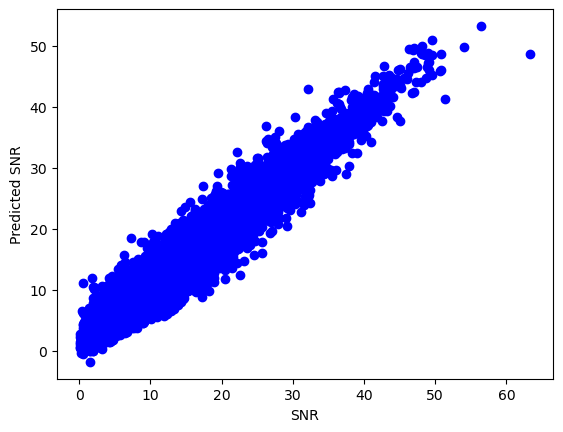

In [12]:
plt.plot(y_test_orig, Predictions, 'bo')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper right')
plt.xlabel('SNR')
plt.ylabel('Predicted SNR')

plt.savefig("Figure_predicted.pdf", format="pdf", bbox_inches="tight")
plt.show()